<a href="https://colab.research.google.com/github/Ayat166/insurance-preprocessing/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/insurance.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
for col in data.columns:
  print(col)
  print(f'First 5 unique values: {data[col].unique()[:5]}')
  print(f'Number of unique values: {data[col].nunique()}\n')

age
First 5 unique values: [19 18 28 33 32]
Number of unique values: 47

sex
First 5 unique values: ['female' 'male']
Number of unique values: 2

bmi
First 5 unique values: [27.9   33.77  33.    22.705 28.88 ]
Number of unique values: 548

children
First 5 unique values: [0 1 3 2 5]
Number of unique values: 6

smoker
First 5 unique values: ['yes' 'no']
Number of unique values: 2

region
First 5 unique values: ['southwest' 'southeast' 'northwest' 'northeast']
Number of unique values: 4

charges
First 5 unique values: [16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]
Number of unique values: 1337



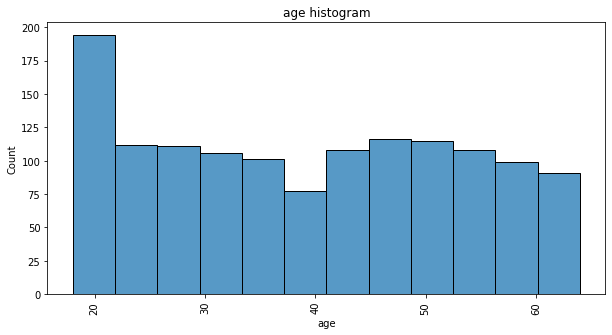

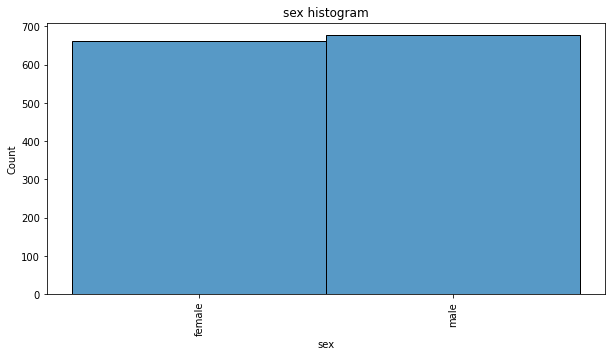

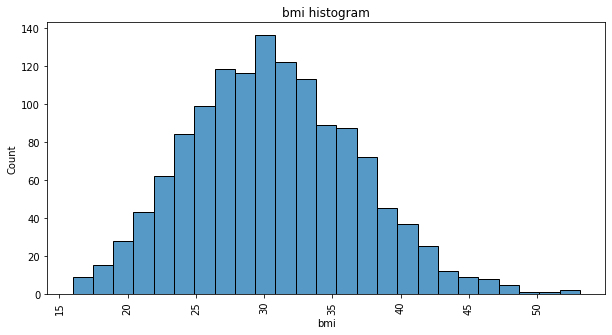

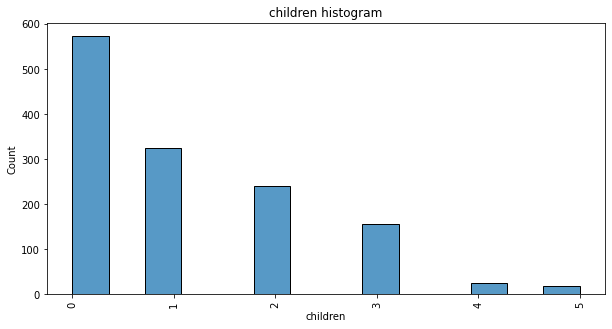

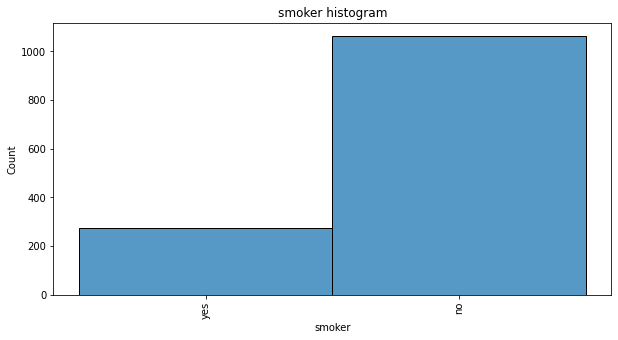

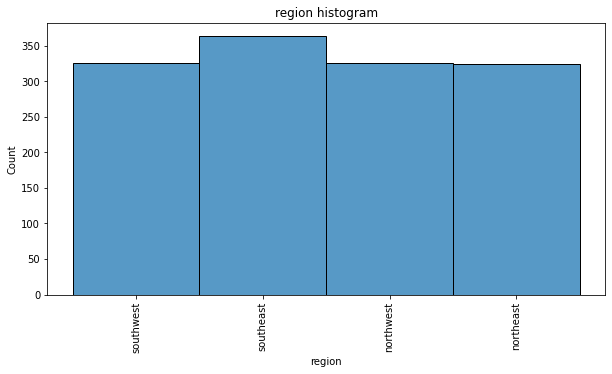

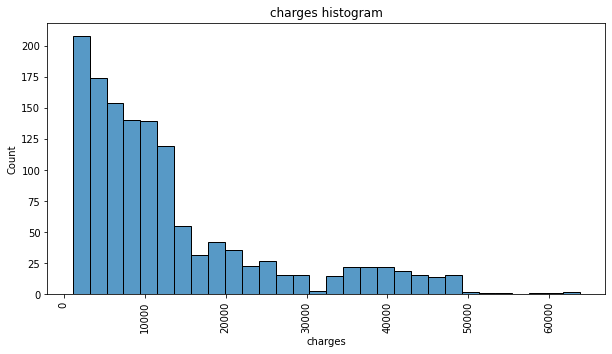

In [ ]:
for col in data.columns:
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.tick_params(axis='x', rotation=90)
  plt.title(f'{col} histogram')
  sns.histplot(data=data, x=col, ax=ax)
  plt.show()

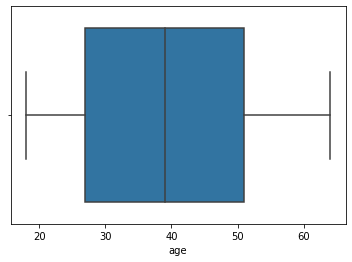

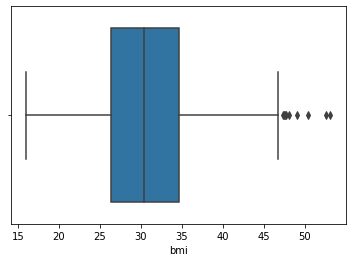

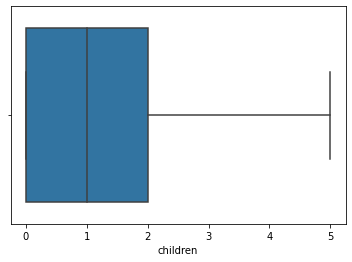

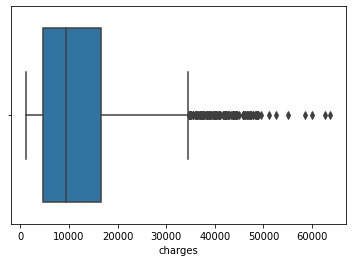

In [ ]:
for col in data.columns:
    if data[col].dtype != 'object':
        bp = sns.boxplot(data = data, x = col)
        plt.show()

In [ ]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
data.drop_duplicates(inplace=True, ignore_index=True)

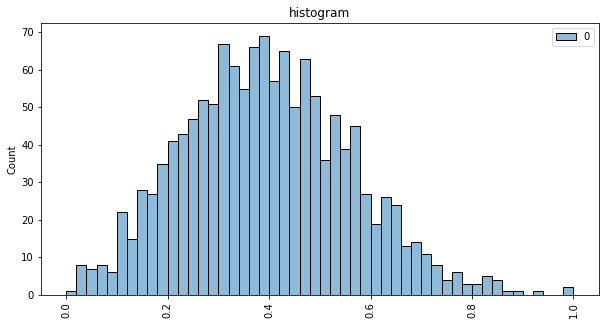

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
p = scaler.fit_transform(data[["bmi"]])
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='x', rotation=90)
plt.title('histogram')
sns.histplot(p, bins=50)
plt.show()

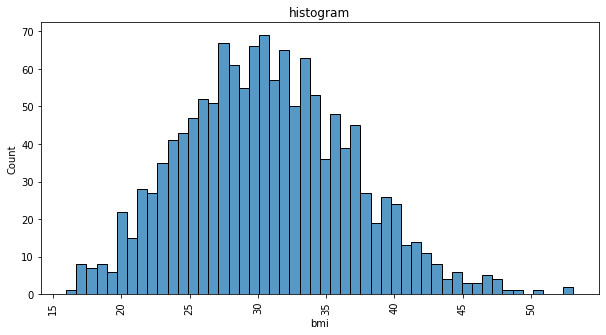

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='x', rotation=90)
plt.title('histogram')
sns.histplot(data.bmi, bins=50)
plt.show()

In [ ]:
data.bmi = scaler.fit_transform(data[["bmi"]])
data.bmi

0       0.321227
1       0.479150
2       0.458434
3       0.181464
4       0.347592
          ...   
1332    0.403820
1333    0.429379
1334    0.562012
1335    0.264730
1336    0.352704
Name: bmi, Length: 1337, dtype: float64

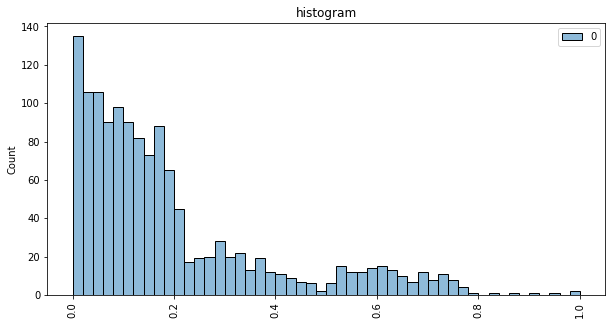

In [ ]:
p = scaler.fit_transform(data[["charges"]])
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='x', rotation=90)
plt.title('histogram')
sns.histplot(p, bins=50)
plt.show()

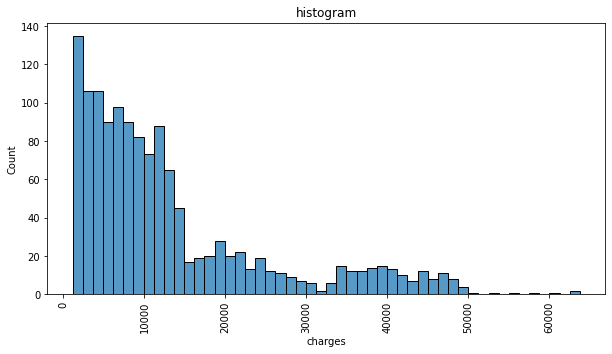

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='x', rotation=90)
plt.title('histogram')
sns.histplot(data.charges, bins=50)
plt.show()

In [ ]:
data.charges = scaler.fit_transform(data[["charges"]])

In [ ]:
labelencoder = LabelEncoder()
data['sex'] = labelencoder.fit_transform(data['sex'])
data['sex'] = pd.to_numeric(data['sex'], downcast='integer')
data['smoker'] = labelencoder.fit_transform(data['smoker'])
data['smoker'] = pd.to_numeric(data['smoker'], downcast='integer')
data['region'] = labelencoder.fit_transform(data['region'])
data['region'] = pd.to_numeric(data['region'], downcast='integer')

In [ ]:
data.dtypes

age           int64
sex            int8
bmi         float64
children      int64
smoker         int8
region         int8
charges     float64
dtype: object

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,0.321227,0,1,3,0.251611
1,18,1,0.479150,1,0,2,0.009636
2,28,1,0.458434,3,0,2,0.053115
3,33,1,0.181464,0,0,1,0.333010
4,32,1,0.347592,0,0,1,0.043816


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X)
print(y)

[[19.          0.          0.3212268   0.          1.          3.        ]
 [18.          1.          0.47914985  1.          0.          2.        ]
 [28.          1.          0.45843422  3.          0.          2.        ]
 ...
 [18.          0.          0.56201238  0.          0.          2.        ]
 [21.          0.          0.26472962  0.          0.          3.        ]
 [61.          0.          0.35270379  0.          1.          1.        ]]
[0.25161076 0.00963595 0.05311516 ... 0.00810808 0.01414352 0.44724873]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7631717420685994

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.06767456966589938

In [ ]:
poly_X_train, poly_X_test, poly_y_train, poly_y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(poly_X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, poly_y_train)

LinearRegression()

In [ ]:
y_pred_Poly = regressor.predict(poly_X_test)

In [ ]:
r2_score(poly_y_test, y_pred_Poly)

0.7631717420685994

In [ ]:
mean_absolute_error(poly_y_test, y_pred_Poly)

0.06767456966589938